<a href="https://colab.research.google.com/github/nazmul-kaonine/Data-Science-Projects/blob/master/Handwritten%20Digit%20Classification%20using%20Multiple%20Descriptors%20%26%20ANN/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
%matplotlib inline
import cv2
import os
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
import random

# importing a module for splitting a dataset into train, and test
from sklearn.model_selection import train_test_split
# import Knn classifier
from sklearn.neighbors import KNeighborsClassifier
# confusion metric
from sklearn import metrics
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

import os
import h5py
import glob
import cv2
from keras.preprocessing import image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

0

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
                                
                              


                        
        


    return images, labels

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/DLA2/', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/DLA2/', kind='t10k')

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
def display_image(position):
    image = X_train[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

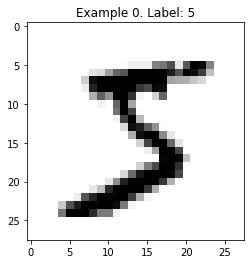

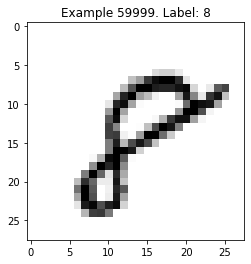

In [ ]:
display_image(0)
plt.show()
display_image(59999)

In [ ]:
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

X_test.shape


#RAW INPUTS

####K NEAREST NEIGHBOR

Train dataset after reshaping:(55000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)
9


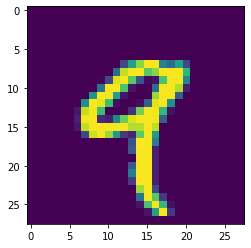

In [ ]:
train_path=train_path.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))
## Show an image from theh dataset
import matplotlib.pyplot as plt
plt.imshow(train_path[4])
print(train_labels[4])

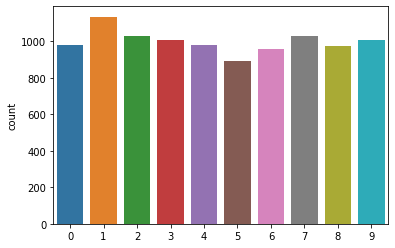

In [ ]:
sns.countplot(train_data)
plt.show()# looks kinda okay
# or we can just print


In [ ]:
print("train data")
y_value=np.zeros((1,10))
for i in range (10):
    print("occurance of ",i,"=",np.count_nonzero(train_labels==i))
    y_value[0,i-1]= np.count_nonzero(train_labels==i)

train data
occurance of  0 = 5923
occurance of  1 = 6742
occurance of  2 = 5958
occurance of  3 = 6131
occurance of  4 = 5842
occurance of  5 = 5421
occurance of  6 = 5918
occurance of  7 = 6265
occurance of  8 = 5851
occurance of  9 = 5949


<BarContainer object of 10 artists>

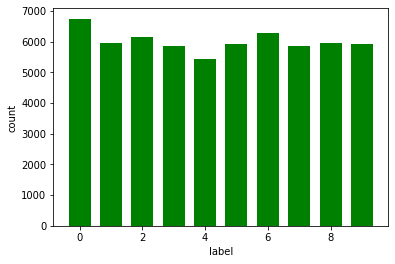

In [ ]:
y_value=y_value.ravel()
x_value=[0,1,2,3,4,5,6,7,8,9]
plt.xlabel('label')
plt.ylabel('count')
plt.bar(x_value,y_value,0.7,color='g')

In [ ]:
train_data = (X_train)
test_data= (X_test)
#separating labels and pixels
train_labels=(y_train)

#train_data=train_data/train_data.max()

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels[1]

0

In [ ]:
#converting train_label in one hot encoder representation 
train_data=np.reshape(train_data,[784,60000])
train_label=np.zeros((10,60000))
for col in range (60000):
    val=train_labels[col]
    for row in range (10):
        if (val==row):
            train_label[val,col]=1
print("train_data shape="+str(np.shape(train_data)))
print("train_label shape="+str(np.shape(train_label)))

train_data shape=(784, 60000)
train_label shape=(10, 60000)


In [ ]:
train_data.shape

(784, 60000)

In [ ]:
#activation functions sigmoid relu and softmax
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

def softmax(Z):
    e_x = np.exp(Z)
    A= e_x / np.sum(np.exp(Z))  
    cache=Z
    return A,cache   

In [ ]:
#derivative of activation function
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def softmax_backward(Z,cache):
    Z=cache
    length=10  
    dZ=np.zeros((60000,10))
    Z=np.transpose(Z)
    for row in range (0,60000):
            den=(np.sum(np.exp(Z[row,:])))*(np.sum(np.exp(Z[row,:])))
            for col in range (0,10):
                sums=0
                for j in range (0,10):
                    if (j!=col):
                        sums=sums+(math.exp(Z[row,j]))
                
                dZ[row,col]=(math.exp(Z[row,col])*sums)/den           
    dZ=np.transpose(dZ)
    Z=np.transpose(Z)

    assert (dZ.shape == Z.shape)
    return dZ

In [ ]:
#initializing the parameters weights and bias
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

In [ ]:
#forward propagation
def linear_forward(A, W, b):
    Z = np.dot(W,A) +b
    cache = (A, W, b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        #print("Z="+str(Z))
        A, activation_cache = relu(Z) 
    elif activation == "softmax":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)               
    return AL, caches

In [ ]:
#cost function
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    #print("cost="+str(cost))
    return cost

In [ ]:
#upgrade function for weights and bias
def update_parameters(parameters, grads, learning_rate):
    for l in range(len_update-1):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)] - (learning_rate*grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db" + str(l+1)])
    return parameters

In [ ]:
def plot_graph(cost_plot):
       
    x_value=list(range(1,len(cost_plot)+1))
    #print(x_value)
    #print(cost_plot)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.plot(x_value,cost_plot,0.,color='g')

In [ ]:
#defining structure of neural network
layers_dims = [784,500,400,300,100,10] #  n-layer model (n=6 including input and output layer)
len_update=len(layers_dims)

In [ ]:
#function to call sub_functions
def L_layer_model(X, Y, layers_dims, learning_rate , num_iterations , print_cost=False):#lr was 0.009
    print("training...")
    costs = []  
    cost_plot=np.zeros(num_iterations)
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost =compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate) 
        cost_plot[i]=cost;
    
    plot_graph(cost_plot)
    return parameters

In [ ]:
#variable parameter in network learning_rate, iterationd 
parameters = L_layer_model(train_data, train_label, layers_dims,learning_rate = 0.0005, num_iterations =1 , print_cost = True) 
print("training done")

training...


ValueError: ignored

In [ ]:
model = NN(num_inputs,hidden_size,num_outputs)
cost_dict, tests_dict = model.train(x_train,y_train,num_iterations=num_iterations,learning_rate=learning_rate)

In [ ]:
import numpy as np
import h5py
#data file type h5py
import time
import copy
from random import randint




In [ ]:
y_test.shape

(10000,)

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [ ]:


####################################################################################
#Implementation of stochastic gradient descent algorithm

class NN:
    first_layer = {}
    second_layer = {}

    def __init__(self, inputs, hidden, outputs):
        # initialize the model parameters, including the first and second layer 
        # parameters and biases
        self.first_layer['para'] = np.random.randn(hidden,inputs) / np.sqrt(num_inputs)
        self.first_layer['bias'] = np.random.randn(hidden,1) / np.sqrt(hidden)
        self.second_layer['para'] = np.random.randn(outputs,hidden) / np.sqrt(hidden)
        self.second_layer['bias'] = np.random.randn(outputs,1) / np.sqrt(hidden)
        self.input_size = inputs
        self.hid_size = hidden
        self.output_size = outputs

    def __activfunc(self,Z,type = 'ReLU',deri = False):
        # implement the activation function
        if type == 'ReLU':
            if deri == True:
                return np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
            else:
                return np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        elif type == 'Sigmoid':
            if deri == True:
                return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
            else:
                return 1/(1+np.exp(-Z))
        elif type == 'tanh':
            if deri == True:
                return 
            else:
                return 1-(np.tanh(Z))**2
        else:
            raise TypeError('Invalid type!')

    def __Softmax(self,z):
        # implement the softmax function
        return 1/sum(np.exp(z)) * np.exp(z)

    def __cross_entropy_error(self,v,y):
        # implement the cross entropy error
        return -np.log(v[y])

    def __forward(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Z = np.matmul(self.first_layer['para'],x).reshape((self.hid_size,1)) + self.first_layer['bias']
        H = np.array(self.__activfunc(Z)).reshape((self.hid_size,1))
        U = np.matmul(self.second_layer['para'],H).reshape((self.output_size,1)) + self.second_layer['bias']
        predict_list = np.squeeze(self.__Softmax(U))
        error = self.__cross_entropy_error(predict_list,y)
        
        dic = {
            'Z':Z,
            'H':H,
            'U':U,
            'f_X':predict_list.reshape((1,self.output_size)),
            'error':error
        }
        return dic

    def __back_propagation(self,x,y,f_result):
        # implement the back propagation process, compute the gradients
        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - f_result['f_X'])).reshape((self.output_size,1))
        db_2 = copy.copy(dU)
        dC = np.matmul(dU,f_result['H'].transpose())
        delta = np.matmul(self.second_layer['para'].transpose(),dU)
        db_1 = delta.reshape(self.hid_size,1)*self.__activfunc(f_result['Z'],deri=True).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))

        grad = {
            'dC':dC,
            'db_2':db_2,
            'db_1':db_1,
            'dW':dW
        }
        return grad

    def __optimize(self,b_result, learning_rate):
        # update the hyperparameters
        self.second_layer['para'] -= learning_rate*b_result['dC']
        self.second_layer['bias'] -= learning_rate*b_result['db_2']
        self.first_layer['bias'] -= learning_rate*b_result['db_1']
        self.first_layer['para'] -= learning_rate*b_result['dW']

    def __loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.__forward(x,y)['error']
        return loss

    def train(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        count = 1
        loss_dict = {}
        test_dict = {}

        for i in rand_indices:
            f_result = self.__forward(X_train[i],Y_train[i])
            b_result = self.__back_propagation(X_train[i],Y_train[i],f_result)
            self.__optimize(b_result,l_rate(learning_rate,i,num_iterations,True))
            
            if count % 1000 == 0:
                if count % 5000 == 0:
                    loss = self.__loss(X_train,Y_train)
                    test = self.testing(x_test,y_test)
                    print('Trained for {} times,'.format(count),'loss = {}, test = {}'.format(loss,test))
                    loss_dict[str(count)]=loss
                    test_dict[str(count)]=test
                else:
                    print('Trained for {} times,'.format(count))
            count += 1

        print('Training finished!')
        return loss_dict, test_dict

    def testing(self,X_test, Y_test):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X_test)):
            y = Y_test[n]
            x = X_test[n][:]
            prediction = np.argmax(self.__forward(x,y)['f_X'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy Test: ',total_correct/len(X_test))
        return total_correct/np.float(len(X_test))

####################################################################################





In [ ]:

x_train = X_train
y_train = y_train
x_test = X_test
y_test = y_test

x_train.shape

(60000, 784)

In [ ]:
# set the number of iterations
num_iterations = 200000
# set the base learning rate
learning_rate = 0.01
# number of inputs
num_inputs = 784
# number of outputs
num_outputs = 10
# size of hidden layer
hidden_size = 300

# data fitting, training and accuracy evaluation
model = NN(num_inputs,hidden_size,num_outputs)
cost_dict, tests_dict = model.train(x_train,y_train,num_iterations=num_iterations,learning_rate=learning_rate)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


Trained for 1000 times,
Trained for 2000 times,
Trained for 3000 times,
Trained for 4000 times,
Accuarcy Test:  0.098
Trained for 5000 times, loss = nan, test = 0.098
Trained for 6000 times,
Trained for 7000 times,
Trained for 8000 times,
Trained for 9000 times,
Accuarcy Test:  0.098
Trained for 10000 times, loss = nan, test = 0.098
Trained for 11000 times,
Trained for 12000 times,
Trained for 13000 times,
Trained for 14000 times,
Accuarcy Test:  0.098
Trained for 15000 times, loss = nan, test = 0.098
Trained for 16000 times,
Trained for 17000 times,
Trained for 18000 times,
Trained for 19000 times,
Accuarcy Test:  0.098
Trained for 20000 times, loss = nan, test = 0.098
Trained for 21000 times,
Trained for 22000 times,
Trained for 23000 times,
Trained for 24000 times,
Accuarcy Test:  0.098
Trained for 25000 times, loss = nan, test = 0.098
Trained for 26000 times,
Trained for 27000 times,
Trained for 28000 times,
Trained for 29000 times,
Accuarcy Test:  0.098
Trained for 30000 times, lo

In [ ]:
model.fit(data_train, labels_train)
accu = model.testing(x_test,y_test)

AttributeError: ignored